predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10 개만 표시 :  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
오차 행렬
[[35  2]
 [ 1 76]]
정확도 0.9737, 정밀도 0.9744, 재현율 : 0.9870, F1 : 0.9806, AUC : 0.9951


오차 행렬
[[35  2]
 [ 1 76]]
정확도 0.9737, 정밀도 0.9744, 재현율 : 0.9870, F1 : 0.9806, AUC : 0.9951
[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-lo

[221]	validation_0-logloss:0.085817
[222]	validation_0-logloss:0.085757
[223]	validation_0-logloss:0.085674
[224]	validation_0-logloss:0.08586
[225]	validation_0-logloss:0.085871
[226]	validation_0-logloss:0.085927
[227]	validation_0-logloss:0.085954
[228]	validation_0-logloss:0.085874
[229]	validation_0-logloss:0.086057
[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.0

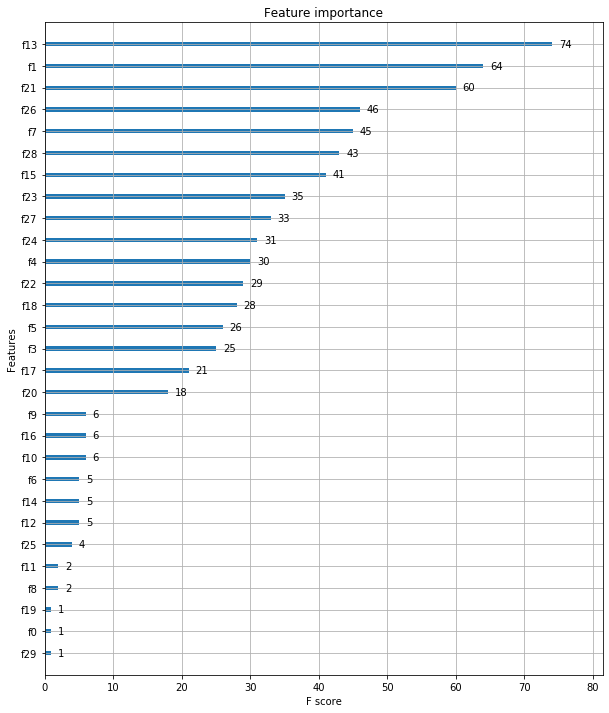

In [31]:
# 파이썬 래퍼 xgboost

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()


# print(dataset.target_names)
# print(cancer_df['target'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_features,y_label, test_size=0.2, random_state=156)
# print(X_train.shape, X_test.shape)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 3,
         'eta' : 0.1,
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100}

num_rounds = 400

wlist = [(dtrain,'train'), (dtest, 'eval')]

# xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds, early_stopping_rounds = 100, evals=wlist)

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [1 if x> 0.5 else 0 for x in pred_probs]
print('예측값 10 개만 표시 : ', preds[:10])


def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 {0:.4f}, 정밀도 {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall,f1, roc_auc))
    
    
get_clf_eval(y_test, preds, pred_probs)    


from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

# fig, ax = plt.subplots(figsize=(10,12))
# plot_importance(xgb_model, ax=ax)
    

print('\n')

# 사이킷런 래퍼 xgboost

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

# 피처 중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax = ax)